# Star Wars Fan Survey

## Summary

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: __does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?__

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The data has several columns, including:

- `RespondentID` - An anonymized ID for the respondent (person taking the survey)
- `Gender` - The respondent's gender
- `Age` - The respondent's age
- `Household Income` - The respondent's income
- `Education` - The respondent's education level
- `Location (Census Region)` - The respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` - Has a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` - Has a `Yes` or `No` response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.


### Data Exploration and Little Cleanup
To Explore data and perform cleanup, we will follow below steps-
- Read the dataset 
- Explore
- Review Columns
- Remove any rows where `RespondentID` is `Nan`

Following above will give us basic information about the dataset with no null value in `RespondentID`

In [269]:
# Read the data set into a dataframe
import pandas as pd
star_wars = pd.read_csv(r"E:\vinod\profession\learn\datascience\dataquest\starwars\StarWars.csv", encoding="ISO-8859-1")
# Explore the data; Look for any strange values in the columns and rows.
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [270]:
# Review the column names 
star_wars.columns


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [271]:
#Remove any rows where RespondentID is NaN.

# Before removing rows where RespondentID is NaN, we will capture data in very first row, as it will require identify the column purpose
star_wars_firstrow = star_wars.iloc[:1,:]

# Removing Nan Rows
star_wars = star_wars[star_wars["RespondentID"].notnull()]
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [272]:
# Verifying any null values
star_wars[star_wars["RespondentID"].isnull()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


#### Notes
In the dataset there are two columns -
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?
In this columns, the values are in `Yes`,`No` or `NaN`, we can convert this values to boolean datatype which will help us in analysis

__Steps to convert this values__
- Convert the `Have you seen any of the 6 films in the Star Wars franchise?` column to the Boolean type.
- Convert the `Do you consider yourself to be a fan of the Star Wars film franchise?` column to the Boolean type.

With above steps we will get `True`, `False` or `NaN` values in above two columns


In [273]:
# Exploring values

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(), '\n')
print('-----------------------------------------------------------------------------------------', '\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(), '\n')

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

----------------------------------------------------------------------------------------- 

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



In [274]:
# Converting the Boolean values

## Creating dictionary to map values in series
bool_response = {
    
    "Yes" : True,
    "No":False
}

## Mapping Dictionary for bool values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_response)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_response)


In [275]:
## Exploring and reviewing updated Bool Values

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(), '\n')
print('-----------------------------------------------------------------------------------------', '\n')
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(), '\n')

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

----------------------------------------------------------------------------------------- 

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



In [276]:
## Reviewing converted values
star_wars.iloc[:10,0:3]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True
6,3.292719e+09,True,True
7,3.292685e+09,True,True
8,3.292664e+09,True,True
9,3.292654e+09,True,True
10,3.292640e+09,True,False


#### Notes
We have converted and verified responses for 2nd and 3rd column.

The 4th column `Which of the following Star Wars films have you seen? Please select all that apply.'` and the next 5 columns `Unnamed: 4`, `Unnamed: 5`, `Unnamed: 6`, `Unnamed: 7`, `Unnamed: 8` represent a single checkbox question. 

The columns of this question are- `Which of the following Star Wars films have you seen? Please select all that apply.` 
-  Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
- `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
- `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
- `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
- `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.


For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

we will convert the reponses to boolean values, 

#### Steps to convert the reponses
- Convert values in each column given above to `True` or `False`
- Rename columns for ease reading and plotting

By following above steps we will have boolean values for each movie column, also the name of columns will be changed


In [277]:
# Converting values to True or False

## Creating a dictionary to map values

### Using numpy for nan values
import numpy as np
seenmovie_response={
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

In [278]:
## Mapping Values

for movie in star_wars.columns[3:9]:
    star_wars[movie] = star_wars[movie].map(seenmovie_response)

In [279]:
star_wars.iloc[:10,:9]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True
6,3.292719e+09,True,True,True,True,True,True,True,True
7,3.292685e+09,True,True,True,True,True,True,True,True
8,3.292664e+09,True,True,True,True,True,True,True,True
9,3.292654e+09,True,True,True,True,True,True,True,True
10,3.292640e+09,True,False,False,True,False,False,False,False


In [280]:
# Renaming the columns
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "sw_ep_1",
        "Unnamed: 4": "sw_ep_2",
        "Unnamed: 5": "sw_ep_3",
        "Unnamed: 6": "sw_ep_4",
        "Unnamed: 7": "sw_ep_5",
        "Unnamed: 8": "sw_ep_6"
        })

star_wars.iloc[:9,:9]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,sw_ep_1,sw_ep_2,sw_ep_3,sw_ep_4,sw_ep_5,sw_ep_6
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True
6,3.292719e+09,True,True,True,True,True,True,True,True
7,3.292685e+09,True,True,True,True,True,True,True,True
8,3.292664e+09,True,True,True,True,True,True,True,True
9,3.292654e+09,True,True,True,True,True,True,True,True


#### Notes
We have successfully converted values to Boolean
Now let explore the next columns

In [281]:
star_wars.iloc[0:10,[0,9,10,11,12,13,14]]

,RespondentID,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.292880e+09,3,2,1,4,5,6
2,3.292880e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,1,2,3,4,5,6
4,3.292763e+09,5,6,1,2,4,3
5,3.292731e+09,5,4,6,2,1,3
6,3.292719e+09,1,4,3,6,5,2
7,3.292685e+09,6,5,4,3,1,2
8,3.292664e+09,4,5,6,3,2,1
9,3.292654e+09,5,4,6,2,1,3
10,3.292640e+09,1,2,3,4,5,6


#### Notes
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`  

Here we will convert the values to numeric type, then will rename columns for analysis

#### Steps to convert the responses
- Convert each column to a `float` type
- Rename the columns

In [282]:
# Converting each columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [283]:
# Rename the column name

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_ep1",
        "Unnamed: 10": "ranking_ep2",
        "Unnamed: 11": "ranking_ep3",
        "Unnamed: 12": "ranking_ep4",
        "Unnamed: 13": "ranking_ep5",
        "Unnamed: 14": "ranking_ep6"
        })


In [284]:
# Reviewing data
star_wars.iloc[0:10,[0,9,10,11,12,13,14]]

,RespondentID,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
1,3.292880e+09,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,5.0,4.0,6.0,2.0,1.0,3.0
6,3.292719e+09,1.0,4.0,3.0,6.0,5.0,2.0
7,3.292685e+09,6.0,5.0,4.0,3.0,1.0,2.0
8,3.292664e+09,4.0,5.0,6.0,3.0,2.0,1.0
9,3.292654e+09,5.0,4.0,6.0,2.0,1.0,3.0
10,3.292640e+09,1.0,2.0,3.0,4.0,5.0,6.0


#### Notes
Till this point we have partially cleaned up and formated the data
Lets explore the data further to check what all analysis can be performed

#### Steps for data exploration
- Explore the columns which are modified in above steps
- Look for data in adjacent columns, let see if data needs any type of formatting or cleanup


In [285]:
# Exploring data which has been formatted above 

star_wars.iloc[0:10, 0:15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,sw_ep_1,sw_ep_2,sw_ep_3,sw_ep_4,sw_ep_5,sw_ep_6,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0


In [286]:
star_wars.iloc[:5,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [287]:
star_wars_firstrow.iloc[:,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [288]:
star_wars.iloc[:10,29:39]

,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


#### Notes
With the above exploration we identified that we will have to work on converting values in boolean or ranking format for 15-34 columns

Let's start converting first 15-28 column-
This columns ask the respondent _"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her"_ which reflects the popularity of the character between the audience

#### Steps to modify this data
- Rename column names as per the character
- Explore values for each character
- Try to convert values in numeric form


In [289]:
# renaming columns as per the character name
star_wars = star_wars.rename(columns={
    
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo",
    "Unnamed: 16":"Luke Skywalker",
    "Unnamed: 17":"Princess Leia Organa",
    "Unnamed: 18":"Anakin Skywalker",
    "Unnamed: 19":"Obi Wan Kenobi",
    "Unnamed: 20":"Emperor Palpatine",
    "Unnamed: 21":"Darth Vader",
    "Unnamed: 22":"Lando Calrissian",
    "Unnamed: 23":"Boba Fett",
    "Unnamed: 24":"C-3P0",
    "Unnamed: 25":"R2 D2",
    "Unnamed: 26":"Jar Jar Binks",
    "Unnamed: 27":"Padme Amidala",
    "Unnamed: 28":"Yoda"
    
})

In [290]:
# Explore values for each character
for char in star_wars.iloc[:,15:29]:
    print("Character : ",char,'\n')
    print(star_wars[char].value_counts(), '\n')
    print("------------------------------------------------------------------------",'\n')

Character :  Han Solo 

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64 

------------------------------------------------------------------------ 

Character :  Luke Skywalker 

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Luke Skywalker, dtype: int64 

------------------------------------------------------------------------ 

Character :  Princess Leia Organa 

Very favorably                                 547
Somewhat favorably           

#### Notes

From the above data we can say response are in types like -
`Very favorably                                 
Somewhat favorably                             
Neither favorably nor unfavorably (neutral)    
Unfamiliar (N/A)                               
Somewhat unfavorably
Very unfavorably` 

we will convert this values to ranking form, there are 6 different types of responses inclusive of positive and negative.
where `Unfamiliar (N/A)`,`Somewhat unfavorably`,`Very unfavorably` are negative responses and `Very favorably`,`Somewhat favorably` are positive responses.

Response `Unfamiliar (N/A)` and `Very unfavorably` seems to be same so let this response be `-1`  
Response `Somewhat unfavorable` be `0`  
Response `Neither favorably nor unfavorably (neutral) ` be `1`  
Response `Somewhat favorably ` be `2`  
Response `Very favorably ` be `3`

Let `NaN` values be treated as `0`


In [291]:
# Creating character rank dict for mapping values
character_popularity_rank = {
     'Very unfavorably' : -1,
    'Somewhat unfavorably' : 0,
    'Unfamiliar (N/A)' : -1,
    'Neither favorably nor unfavorably (neutral)' : 1,
    'Somewhat favorably' : 2,
    'Very favorably' : 3,
    np.nan:0
}

In [292]:
# character popularity rank mapping
# star_wars.iloc[:,15:29]
for char in star_wars.columns[15:29]:
    star_wars[char] = star_wars[char].map(character_popularity_rank)

In [293]:
# Review data
star_wars.iloc[:5,15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,3,3,3,3,3,3,3,-1,-1,3,3,3,3,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,2,2,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,3,3,3,3,3,2,3,2,0,3,3,3,3,3
5,3,2,2,0,3,-1,2,1,3,2,2,-1,2,2


#### Notes
We most of the values cleaned up, data seems to be ready for analysis and visualisation

## Data Analysis and Visualisation

### Favorite Movie As per the Ranking

In [294]:
# A look at data for analysing
star_wars.iloc[0:2,[0,9,10,11,12,13,14]]

,RespondentID,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
1,3.292880e+09,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
# Computing Mean for each ranking column
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
ranking_mean

ranking_ep1    3.732934
ranking_ep2    4.087321
ranking_ep3    4.341317
ranking_ep4    3.272727
ranking_ep5    2.513158
ranking_ep6    3.047847
dtype: float64

In [296]:
# Plotting values in bar chart

import matplotlib.pyplot as plt
%matplotlib inline

# method to create a chart

## `barchart_value` - prvovide series which needs to be placed on charts
## `xLabel` - Label to be given on x axis
## `yLabel` - Label to be given on y axis
## `ctitle` - title to represent the chart
## `colors` - custom colors for bar lines
## `barsize` - area of chart
## `barlinewidth` - line width
def barchart(barchart_value, xLabel, yLabel, ctitle, colors, barsize, barlinewidth):

    # Defining style to use
    plt.style.use('ggplot')

    # set font
#     plt.rcParams['font.family'] = 'sans-serif'
#     plt.rcParams['font.sans-serif'] = 'Helvetica'


    # set the style of the axes and the text color
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=1
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    plt.rcParams['text.color']='#333F4B'
    plt.rcParams.update({'figure.autolayout': True})

    # placeholder for y axis
    my_range=list(range(1,len(barchart_value.index)+1))
        
    fig, ax = plt.subplots(figsize=barsize)

    # Formatting bar lines 
    plt.hlines(y=my_range, xmin=0, xmax=barchart_value, color=colors, linewidth=barlinewidth, alpha=0.8)


    # Plotting a marker at the end of bar line
    plt.plot(barchart_value, my_range, "-", markersize=8, color='#b3a200', alpha=0.8)

    #set label
    ax.set_xlabel(xLabel, fontsize=15, fontweight='black', color = '#333F4B')
    ax.set_ylabel(yLabel, fontsize=15, fontweight='black', color = '#333F4B')

    # set title
    plt.title(ctitle, fontsize=15, fontweight='black', color = '#333F4B')

    # set axis
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks(my_range, barchart_value.index)

    # fig.text(-0.23, 0.96, 'Movies', fontsize=15, fontweight='black', color = '#333F4B')

    # change the style of the axis spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
#     ax.spines['bottom'].set_bounds(0,barchart_value.max())
#     plt.tight_layout()

    # set the spines position
    ax.spines['bottom'].set_position(('axes', -0.04))
    ax.spines['left'].set_position(('axes', 0.015))
    ax.grid(False)
    ax.set_facecolor('white')
    

In [297]:
# Creating colorset for display chart
def colorset(data, colors):
    color = []
    for x in data:
        if (x == data.max()):
            color.append(colors[0])
        elif (x == data.min()):
            color.append(colors[1])
        else:
            color.append(colors[2])
    return color

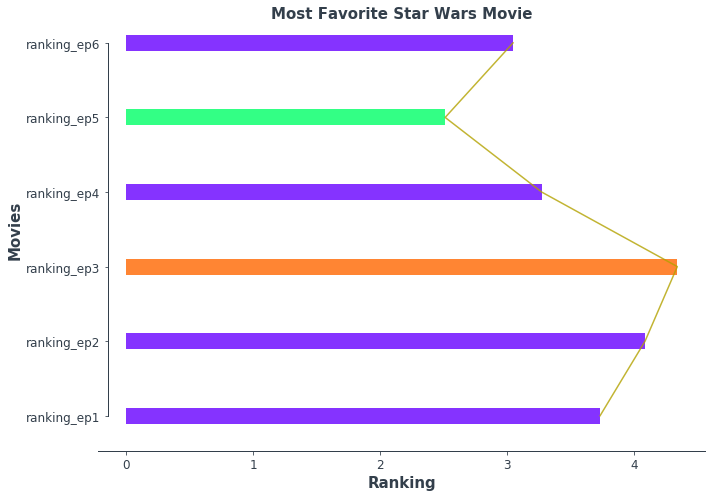

In [298]:
ranking_colorset = colorset(ranking_mean, ['#ff6700','#00ff67','#6700ff'])
# Display bar chart
barchart(ranking_mean, 'Ranking', 'Movies', 'Most Favorite Star Wars Movie',ranking_colorset,[10,7],16)

### <span style='color:Blue'>Conclusion - Note - 1 </span>
 Movies which rank least where the most favorite and 6 means it was the least favorite starwars movie, From the above we can conclude 
 - `ranking_ep5` i.e. `Star Wars: Episode V The Empire Strikes Back` is the most liked movie.
 - `ranking_ep3` i.e. `Star Wars: Episode III Revenge of the Sith` and `ranking_ep2`i.e. `Star Wars: Episode II Attack of the Clones.` were the least favorite movies
 - From the overall view we can say __Star Wars: Episode V The Empire Strikes Back__ is the best movie

### Most Watch Movies

In [299]:
# A look at data for analysing most watch movies
star_wars[star_wars.columns[3:9]].head()

,sw_ep_1,sw_ep_2,sw_ep_3,sw_ep_4,sw_ep_5,sw_ep_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [300]:
# Computing sum of watch movies
mostwatch_movies = star_wars[star_wars.columns[3:9]].sum()
mostwatch_movies

sw_ep_1    673
sw_ep_2    571
sw_ep_3    550
sw_ep_4    607
sw_ep_5    758
sw_ep_6    738
dtype: int64

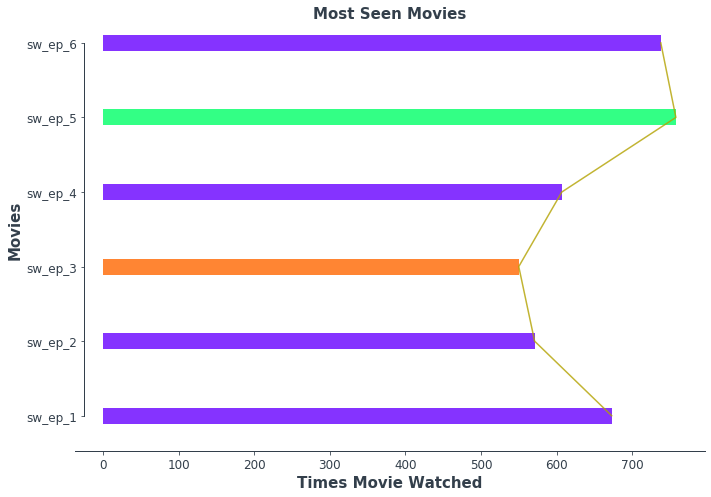

In [301]:
# Displaying chart for seen movie
colorset_seenmovie = colorset(mostwatch_movies,['#00ff67','#ff6700','#6700ff'])
barchart(mostwatch_movies, 'Times Movie Watched', 'Movies', 'Most Seen Movies', colorset_seenmovie,[10,7],16)

### <span style='color:Blue'>Conclusion - Note - 2 </span>

The value which is highest i.e `sw_ep_5` is the most watched movies than other movie of starwars, From the above chart we can conclude
- `sw_ep_5` i.e. `Star Wars: Episode V The Empire Strikes Back` is the most watched movies
- `sw_ep_3` i.e. `Star Wars: Episode III Revenge of the Sith` is the least watched movies
- This concludes movie which is liked by most individuals, is watched more number of times. Movie which is watched most number of times and liked by most is __Star Wars: Episode V The Empire Strikes Back__

### Gender Base Favorite and Most watched movies

In [302]:
# A Look at data for analysis
star_wars.iloc[np.random.permutation(200),[0,9,10,11,12,13,14,33]]

,RespondentID,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6,Gender
191,3.291022e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,3.292581e+09,4.0,1.0,2.0,3.0,5.0,6.0,Male
189,3.291023e+09,4.0,3.0,6.0,5.0,1.0,2.0,Female
166,3.291120e+09,3.0,1.0,2.0,4.0,5.0,6.0,Male
199,3.291003e+09,3.0,4.0,5.0,2.0,6.0,1.0,Male
...,...,...,...,...,...,...,...,...
25,3.292465e+09,1.0,2.0,6.0,3.0,4.0,5.0,Male
141,3.291381e+09,5.0,6.0,3.0,4.0,1.0,2.0,Female
147,3.291331e+09,6.0,5.0,4.0,2.0,3.0,1.0,Male
44,3.292218e+09,6.0,5.0,4.0,2.0,1.0,3.0,Male


In [303]:
# Spliting the data
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [304]:
# Dataset for Male and Female
# Favorite Movie Set
males_favorite = males[males.columns[9:15]].mean()
females_favorite = females[females.columns[9:15]].mean()

# Most Seen Movie set
males_mostwatch_movies = males[males.columns[3:9]].sum()
females_mostwatch_movies = females[females.columns[3:9]].sum()

# color for display chart
# Favorite movie color set
male_ranking_colorset = colorset(males_favorite,['#ff6700','#0098ff','#787878'])
females_ranking_colorset = colorset(females_favorite,['#ff6700','#e700ff','#787878'])

# Most seen movie color set
males_colorset_seenmovie = colorset(males_mostwatch_movies,['#00ff67','#ff6700','#6700ff'])
females_colorset_seenmovie = colorset(females_mostwatch_movies,['#00ff67','#ff6700','#6700ff'])


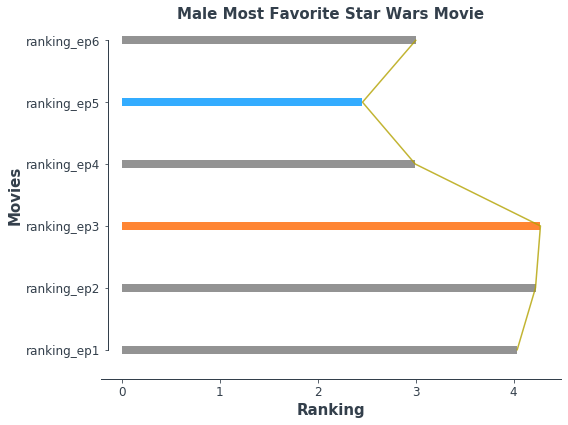

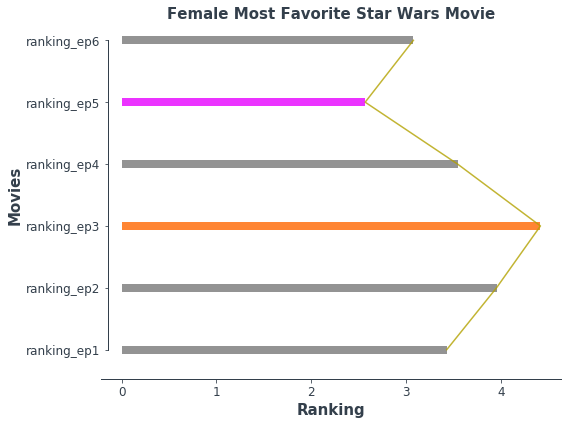

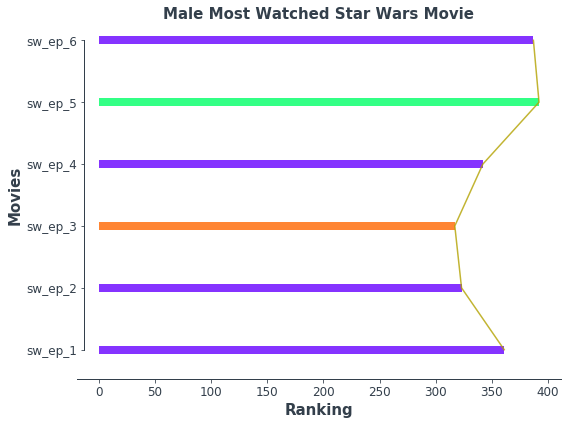

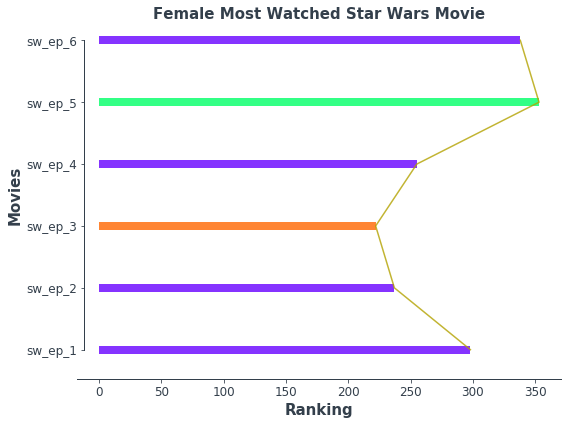

In [305]:
male_fav_chart = barchart(males_favorite, 'Ranking', 'Movies', 'Male Most Favorite Star Wars Movie',male_ranking_colorset,[8,6],8)
female_fav_chart = barchart(females_favorite, 'Ranking', 'Movies', 'Female Most Favorite Star Wars Movie',females_ranking_colorset,[8,6],8)
male_seen_chart = barchart(males_mostwatch_movies, 'Ranking', 'Movies', 'Male Most Watched Star Wars Movie',males_colorset_seenmovie,[8,6],8)
female_seen_chart = barchart(females_mostwatch_movies, 'Ranking', 'Movies', 'Female Most Watched Star Wars Movie',females_colorset_seenmovie,[8,6],8)



In [306]:
# pivot distribution

# Favorite movie data
gender_ranking = star_wars.pivot_table(index='Gender',values=['ranking_ep1',
                                           'ranking_ep2',
                                           'ranking_ep3',
                                           'ranking_ep4',
                                           'ranking_ep5',
                                           'ranking_ep6'],
                      aggfunc='mean')


# most watch movie data
gender_watch_movies = star_wars.pivot_table(index='Gender',values=['sw_ep_1',
                                           'sw_ep_2',
                                           'sw_ep_3',
                                           'sw_ep_4',
                                           'sw_ep_5',
                                           'sw_ep_6'],
                      aggfunc='mean')


gender_ranking.reset_index().head()

,Gender,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
0,Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
1,Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


In [307]:
gender_watch_movies.reset_index().head()

,Gender,sw_ep_1,sw_ep_2,sw_ep_3,sw_ep_4,sw_ep_5,sw_ep_6
0,Female,0.542805,0.431694,0.404372,0.464481,0.642987,0.615665
1,Male,0.726358,0.649899,0.637827,0.688129,0.788732,0.778672


### <span style='color:Blue'>Conclusion - Note - 3 </span>

- Male and Female both have liked `sw_ep_5` i.e  __Star Wars: Episode V The Empire Strikes Back__ most than any other movie, also this movie is most watched than others
- Movie `sw_ep_6` i.e. __Star Wars: Episode VI Return of the Jedi__ is also most watced movie after __Star Wars: Episode V The Empire Strikes Back__
- Males have watched movies more times than Females to some extent
- Females have liked `sw_ep_1` i.e. __Star Wars: Episode I The Phantom Menace__ than Males

### Age based Classification

In [308]:
# Identifying Age groups
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [309]:
# Ranking pivot based on age groups

age_Group_Ranking = star_wars.pivot_table(index='Age', values=['ranking_ep1',
                                           'ranking_ep2',
                                           'ranking_ep3',
                                           'ranking_ep4',
                                           'ranking_ep5',
                                          'ranking_ep6'],
                      aggfunc='mean', dropna=True)

age_Group_Ranking.reset_index().head()

,Age,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
0,18-29,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
1,30-44,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
2,45-60,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
3,> 60,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


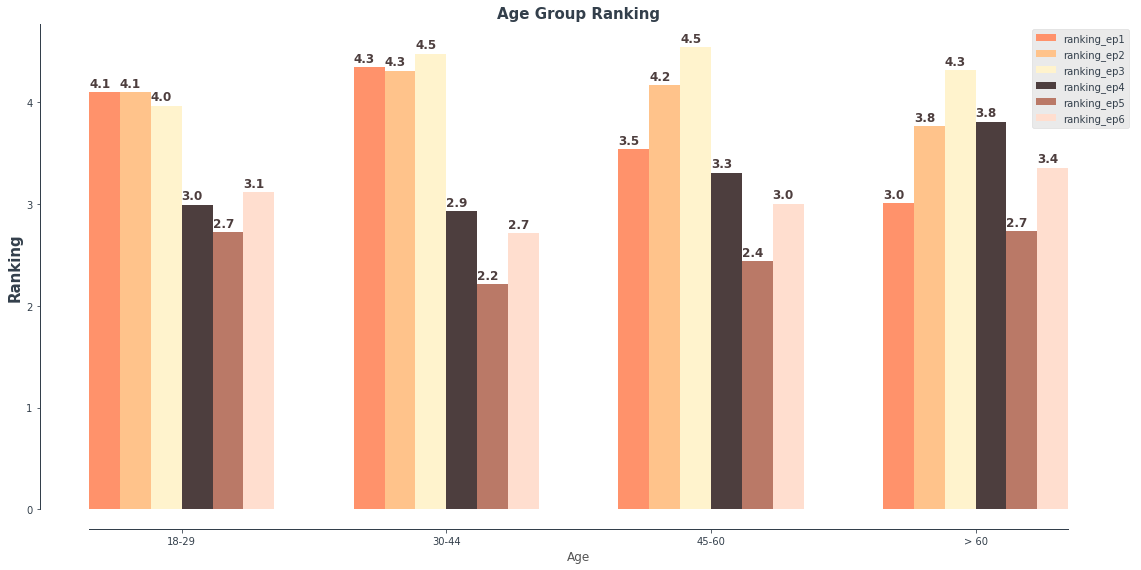

In [310]:
colorset = ['#ff926b','#ffc38b','#fff3cd','#4d3e3e','#ba7967','#ffdecf']

age_graph = age_Group_Ranking.plot.bar(figsize=(16,8),width=0.7, fontsize="large",color=colorset)

# setting background grid to false and color to white 
age_graph.grid(False)
age_graph.set_facecolor('white')

# Modifying spines
age_graph.spines['top'].set_visible(False)
age_graph.spines['right'].set_visible(False)
age_graph.spines['bottom'].set_smart_bounds(True)
age_graph.spines['left'].set_visible(True)
# set the spines position
age_graph.spines['bottom'].set_position(('axes', -0.04))
age_graph.spines['left'].set_position(('axes', 0.015))


# setting position for legend 
age_graph.legend(loc='upper right')

# Title for graph
age_graph.set_title("Age Group Ranking", fontsize=15, fontweight='black', color = '#333F4B')

# Y label
age_graph.set_ylabel('Ranking', fontsize=15, fontweight='black', color = '#333F4B')
for p in age_graph.patches:
    age_graph.annotate(str(round(p.get_height(),1)), (p.get_x(), p.get_height()+0.05), fontsize="large", color='#4d3e3e',fontweight="demibold")   
    

In [311]:
# Ranking pivot based on age groups

age_Group_viewership = star_wars.pivot_table(index='Age', values=['sw_ep_1',
                                           'sw_ep_2',
                                           'sw_ep_3',
                                           'sw_ep_4',
                                           'sw_ep_5',
                                          'sw_ep_6'],
                      aggfunc='mean', dropna=True)

age_Group_viewership.reset_index().head()

,Age,sw_ep_1,sw_ep_2,sw_ep_3,sw_ep_4,sw_ep_5,sw_ep_6
0,18-29,0.733945,0.678899,0.665138,0.697248,0.733945,0.733945
1,30-44,0.652985,0.589552,0.567164,0.656716,0.735075,0.735075
2,45-60,0.621993,0.508591,0.487973,0.567010,0.756014,0.721649
3,> 60,0.531599,0.394052,0.371747,0.386617,0.624535,0.587361


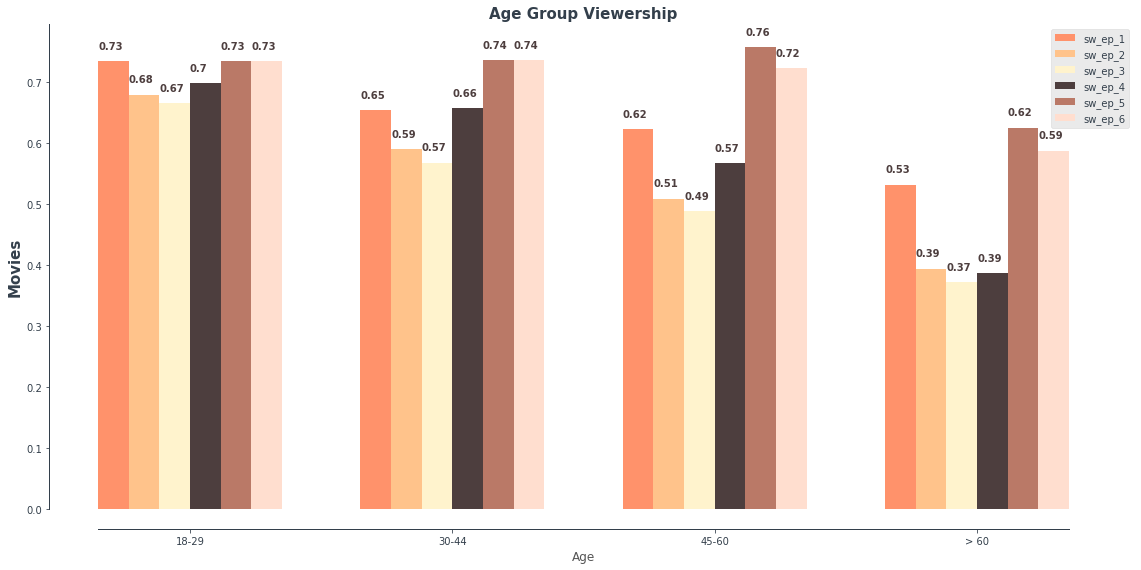

In [312]:
colorset = ['#ff926b','#ffc38b','#fff3cd','#4d3e3e','#ba7967','#ffdecf']

age_group_viewership_graph = age_Group_viewership.plot.bar(figsize=(16,8),width=0.7, fontsize="large",color=colorset)

# setting background grid to false and color to white 
age_group_viewership_graph.grid(False)
age_group_viewership_graph.set_facecolor('white')

# Modifying spines
age_group_viewership_graph.spines['top'].set_visible(False)
age_group_viewership_graph.spines['right'].set_visible(False)
age_group_viewership_graph.spines['bottom'].set_smart_bounds(True)
age_group_viewership_graph.spines['left'].set_visible(True)
# set the spines position
age_group_viewership_graph.spines['bottom'].set_position(('axes', -0.04))
age_group_viewership_graph.spines['left'].set_position(('axes', 0.015))


# setting position for legend 
age_group_viewership_graph.legend(loc='upper right')

# Title for graph
age_group_viewership_graph.set_title("Age Group Viewership", fontsize=15, fontweight='black', color = '#333F4B')

# Y label
age_group_viewership_graph.set_ylabel('Movies', fontsize=15, fontweight='black', color = '#333F4B')
for p in age_group_viewership_graph.patches:
    age_group_viewership_graph.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()+0.02), fontsize="medium", color='#4d3e3e',fontweight="demibold")   
    

### <span style='color:Blue'>Conclusion - Note - 4 </span>
Movies which rank least where the most favorite and 6 means it was the least favorite starwars movie, From the above we can conclude

- `ranking_ep5` i.e. `Star Wars: Episode V The Empire Strikes Back` is the most liked movie by all Age-Groups.
- `ranking_ep3` i.e. `Star Wars: Episode III Revenge of the Sith` was the least favorite movies in age group 45 - 60 and 60 above
- Age Group 18-29, 30-44, did'nt like Episode 1, 2 and 3 
- 
From the overall view we can say Star Wars: Episode V The Empire Strikes Back is the best movie between all age-groups

## Location based analysis

In [313]:
star_wars = star_wars.rename(columns = {'Location (Census Region)' : 'Loc'})

In [314]:
star_wars["Loc"].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Loc, dtype: int64

In [315]:
# Movie Ranking
loc_movie_ranking = star_wars.pivot_table(index='Loc', values=['ranking_ep1',
                                                               'ranking_ep2',
                                                               'ranking_ep3',
                                                               'ranking_ep4',
                                                               'ranking_ep5',
                                                               'ranking_ep6'], 
                                          aggfunc='mean', dropna=True)
loc_movie_ranking.reset_index()

,Loc,ranking_ep1,ranking_ep2,ranking_ep3,ranking_ep4,ranking_ep5,ranking_ep6
0,East North Central,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
1,East South Central,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
2,Middle Atlantic,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
3,Mountain,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
4,New England,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667
5,Pacific,3.582192,3.821918,4.171233,3.219178,2.739726,3.465753
6,South Atlantic,3.684211,4.180451,4.443609,3.406015,2.398496,2.887218
7,West North Central,3.671053,4.105263,4.355263,3.368421,2.552632,2.947368
8,West South Central,3.394737,4.118421,4.473684,3.657895,2.421053,2.934211


C:\Users\vino\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


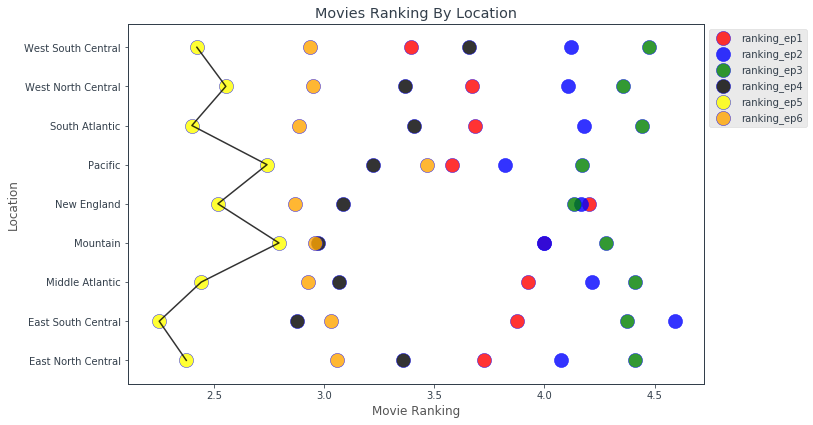

In [316]:
# Movie Ranking by Location
locations = [ "East North Central",
                "East South Central",
                "Middle Atlantic",
                "Mountain",
                "New England",
                "Pacific",
                "South Atlantic",
                "West North Central",
                "West South Central"]
fig=plt.figure(figsize=(8,5))
ax=fig.add_axes([0,0,1,1])
alphavalue = 0.8
dotsize=200
# dot plotting
ax.scatter(loc_movie_ranking.reset_index()["ranking_ep1"], locations,color='Red', edgecolors='b', alpha=alphavalue, s= dotsize, label="ranking_ep1")
ax.scatter(loc_movie_ranking.reset_index()["ranking_ep2"], locations, color='Blue', edgecolors='b', alpha=alphavalue, s= dotsize, label="ranking_ep2")
ax.scatter(loc_movie_ranking.reset_index()["ranking_ep3"], locations, color='Green', edgecolors='b', alpha=alphavalue, s= dotsize, label="ranking_ep3")
ax.scatter(loc_movie_ranking.reset_index()["ranking_ep4"], locations, color='Black', edgecolors='b', alpha=alphavalue, s= dotsize, label="ranking_ep4")
ax.scatter(loc_movie_ranking.reset_index()["ranking_ep5"], locations, color='Yellow', edgecolors='b', alpha=alphavalue, s= dotsize, label="ranking_ep5")
ax.plot(loc_movie_ranking.reset_index()["ranking_ep5"], locations, color='black', alpha=alphavalue)
ax.scatter(loc_movie_ranking.reset_index()["ranking_ep6"], locations, color='orange', edgecolors='b', alpha=alphavalue, s= dotsize, label="ranking_ep6")

# x, y and title 
ax.set_xlabel('Movie Ranking')
ax.set_ylabel('Location')
ax.set_title('Movies Ranking By Location')

# modifying default view
# ax.grid(False)
ax.set_facecolor('white')
# label = mpatches.Patch(color='red', label='ranking_ep1')
# first_legend = plt.legend(handles=[label], loc='lower right')
# ax = plt.gca().add_artist(first_legend)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [317]:
# Movie Ranking
loc_movie_Seen = star_wars.pivot_table(index='Loc', values=['sw_ep_1',
                                                            'sw_ep_2',
                                                            'sw_ep_3',
                                                            'sw_ep_4',
                                                            'sw_ep_5',
                                                            'sw_ep_6'], 
                                          aggfunc='sum', dropna=True)
loc_movie_Seen

,sw_ep_1,sw_ep_2,sw_ep_3,sw_ep_4,sw_ep_5,sw_ep_6
Loc,,,,,,
East North Central,102.0,89.0,89.0,95.0,128.0,121.0
East South Central,24.0,21.0,21.0,27.0,31.0,29.0
Middle Atlantic,79.0,69.0,70.0,76.0,83.0,85.0
Mountain,57.0,47.0,46.0,54.0,61.0,59.0
New England,50.0,44.0,43.0,48.0,55.0,54.0
Pacific,120.0,99.0,92.0,105.0,123.0,124.0
South Atlantic,104.0,82.0,79.0,93.0,125.0,120.0
West North Central,61.0,51.0,49.0,49.0,67.0,63.0
West South Central,62.0,58.0,50.0,49.0,70.0,69.0


C:\Users\vino\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


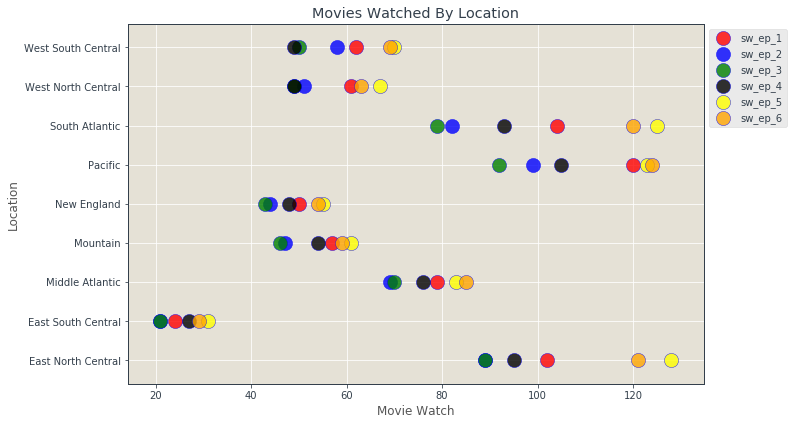

In [318]:
# Movie Watch by Location
locations = [ "East North Central",
                "East South Central",
                "Middle Atlantic",
                "Mountain",
                "New England",
                "Pacific",
                "South Atlantic",
                "West North Central",
                "West South Central"]
fig=plt.figure(figsize=(8,5))
ax=fig.add_axes([0,0,1,1])
alphavalue = 0.8
dotsize=200
# dot plotting
ax.scatter(loc_movie_Seen.reset_index()["sw_ep_1"], locations,color='Red', edgecolors='b', alpha=alphavalue, s= dotsize, label="sw_ep_1")
ax.scatter(loc_movie_Seen.reset_index()["sw_ep_2"], locations, color='Blue', edgecolors='b', alpha=alphavalue, s= dotsize, label="sw_ep_2")
ax.scatter(loc_movie_Seen.reset_index()["sw_ep_3"], locations, color='Green', edgecolors='b', alpha=alphavalue, s= dotsize, label="sw_ep_3")
ax.scatter(loc_movie_Seen.reset_index()["sw_ep_4"], locations, color='Black', edgecolors='b', alpha=alphavalue, s= dotsize, label="sw_ep_4")
ax.scatter(loc_movie_Seen.reset_index()["sw_ep_5"], locations, color='Yellow', edgecolors='b', alpha=alphavalue, s= dotsize, label="sw_ep_5")
ax.scatter(loc_movie_Seen.reset_index()["sw_ep_6"], locations, color='orange', edgecolors='b', alpha=alphavalue, s= dotsize, label="sw_ep_6")

# x, y and title 
ax.set_xlabel('Movie Watch')
ax.set_ylabel('Location')
ax.set_title('Movies Watched By Location')

# modifying default view
# ax.grid(False)
ax.set_facecolor('#E5E1D6')
# label = mpatches.Patch(color='red', label='ranking_ep1')
# first_legend = plt.legend(handles=[label], loc='lower right')
# ax = plt.gca().add_artist(first_legend)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

### <span style='color:Blue'>Conclusion - Note - 5 </span>
Movies which rank least where the most favorite and 6 means it was the least favorite starwars movie, From the above we can conclude

- `ranking_ep5` i.e. `Star Wars: Episode V The Empire Strikes Back` is the most liked movie in all locations and also most eatched movies.
- Location - `East South Central` does'nt seems to have much interest in star_wars
- Location - `East North Central`, `Pacific`, `South Atlantic` have shown highest interest in movie 5 and 6

From the overall view we can say Star Wars: Episode V The Empire Strikes Back is the best movie between all locations

# <span style='color:Green'>Conclusion Notes </span>

### Data has been analysed from multiple dimensions, from which we have to conclude below points
- Most Favorite Movie
    - `Star Wars: Episode V The Empire Strikes Back` is most favorite movie between different locations, age-groups and gender 
- Most Watch Movie
    - Locations - East North Central, Pacific, South Atlantic have shown highest interest in movie `Star Wars: Episode V The Empire Strikes Back` and `Star Wars: Episode VI Return of the Jedi`
    -  `Star Wars: Episode VI Return of the Jedi` is most watched movie after episode 5

- Least Like Movie
    - `Star Wars: Episode III Revenge of the Sith` is least favorite movie hence the least watched movie